# Perceptron - from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# plt.ion()

### 0.1 We provide a simple data set. 


First we show how numpy works, building only one of the 2 classes:

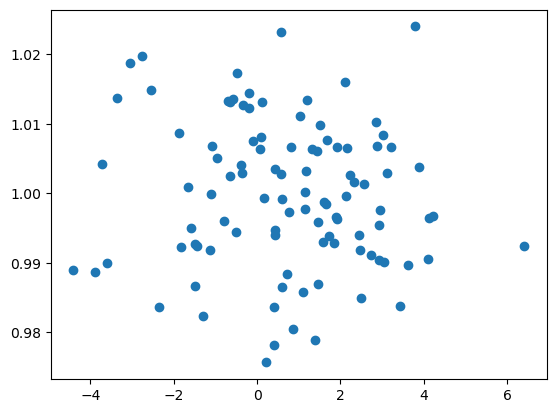

In [2]:
mu1=(1,1)
sigma1=((2, 0.01))
# points distributed according to a multi-variate Gaussian distribution : 
X1 = np.random.normal( mu1, sigma1,(100,2))  
plt.scatter(X1[:,0], X1[:,1])

Now we make another blob and stack the two blobs (classes) together

In [3]:
# data set 3
N=100
N1=N//4
N2=N-N1
D=2
np.random.seed(42)

# parameters for the 1st blob of points
mu1=(0.3,0.3)
sigma1=((1, 0.3))
X1 = np.random.normal( mu1, sigma1,(N1,D))

# parameters for the 2nd blob of points
mu2=(-1,-1)
sigma2=((2, 0.5))
X2 = np.random.normal( mu2, sigma2,(N2,D))

# the two blobs are merged, and labels  +1/-1  are assigned
Xraw = np.concatenate( (X1, X2) )
Y = np.concatenate( (np.ones(N1), -np.ones(N2)) ) # .reshape(N,1)
X = Xraw.copy() # then X will be the extended vector, with the ones added

### 0.2 Preliminary: trick of the ones

It's advised to augment the dataset with ones, "as usual", to account for the bias term in a more elegant and practical way.

In [4]:
X =  np.hstack((np.ones((N,1)), X))  # extended vector

A simple plot of the 2D data (after adding the 1's)

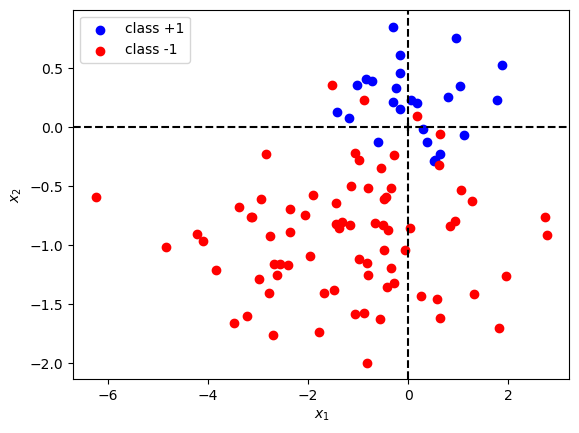

In [5]:
plt.scatter([0,0],[0,0], color='k', marker="+")
plt.axhline(0, ls="--", color='k')
plt.axvline(0, ls="--", color='k')
plt.scatter(X[0:N1,1], X[0:N1,2], color='b', label='class +1')
plt.scatter(X[N1:,1], X[N1:,2], color='red', label='class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig("2dscatter-K=2classes.svg")

### 0.3 We help you out by providing a nice display function

It plots the data AND the hyperplane

In [6]:
def norme(w):
    return (np.sum(w**2))**0.5

In [7]:
def display(X, Y, wInit, iteration, fig=None, ax=None):
    w=wInit.copy()
    w0= w[0] # c'est la partie qui caractérise la distance à l'origine, qui détermine l'ordonnée à l'origine (mais ce n'est pas égal à ça)
    ## on normalise les composantes du vrai vecteur w
    wprime = w[1:] # /(w[1]**2+w[2]**2)**0.5
    print(w, w0, wprime)

    if fig==None or ax==None:
        fig, ax = plt.subplots()

    u_w = (wprime/norme(wprime)) # vecteur unitaire donnant la direction
    distance_origine_droite = -w0/norme(wprime)
    projete_de_Origine_sur_droite = u_w * distance_origine_droite
    print("projete_de_Origine_sur_droite", projete_de_Origine_sur_droite)

    vecteur_Orthogonal_A_La_Droite = np.array([wprime[1],-wprime[0]])
    extremite1 = projete_de_Origine_sur_droite + vecteur_Orthogonal_A_La_Droite*1000
    extremite2 = projete_de_Origine_sur_droite - vecteur_Orthogonal_A_La_Droite*1000
    extremites_abscisses = np.array([extremite1[0], extremite2[0]])
    extremites_ordonnees = np.array([extremite1[1], extremite2[1]])

    Class1 = X[Y==-1,1:] # points of class "-1"
    Class2 = X[Y== 1,1:] # points of class "+1"
    ax.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    ax.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    cmap = cm.jet
    colorGradient=cmap(np.linspace(0.0,1.0,12))
    ax.plot(extremites_abscisses, extremites_ordonnees,  color=colorGradient[iteration%(len(colorGradient))])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    print(extremites_abscisses)


[1.   0.01 1.  ] 1.0 [0.01 1.  ]
projete_de_Origine_sur_droite [-0.009999   -0.99990001]
[  999.990001 -1000.009999]


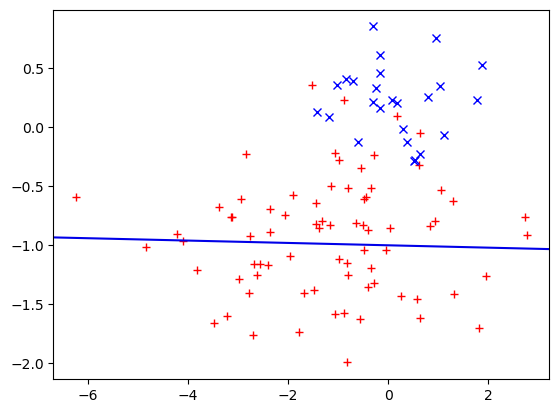

In [9]:
wparameters = np.array([1,0.01,1])
display(X,Y, wparameters, 1)

## 1. Initialization

- make a stupid or random guess for an initial value of the parameters vector `wparameters`, i.e set a value for $\vec w_0=$ `w0`, the initial value of $\vec w$
- choose some values for the hyper-parameters `eta`, `MaxIter`


### Initialization of weights

It's independent of the rest, we just need to know the dimensionality of parameters to be initalized

In [10]:
def initializeWeights(X, type):
    ## data dimension
    D = X.shape[1]

    ## choice 1: deterministic
    if type=="zero":
        wparameters = np.zeros((D))
        wparameters[0] = 0.00001

    ## choice 2: uniform random centered in 0
    ##           with appropriate order of magnitude
    elif type=="random":
        wparameters = np.random.normal(0, np.sqrt(D), D)

    return wparameters

[ 0.86033415 -0.23948079  1.12182946] 0.8603341498539964 [-0.23948079  1.12182946]
projete_de_Origine_sur_droite [ 0.15657798 -0.73347756]
[ 1121.98603345 -1121.67287749]


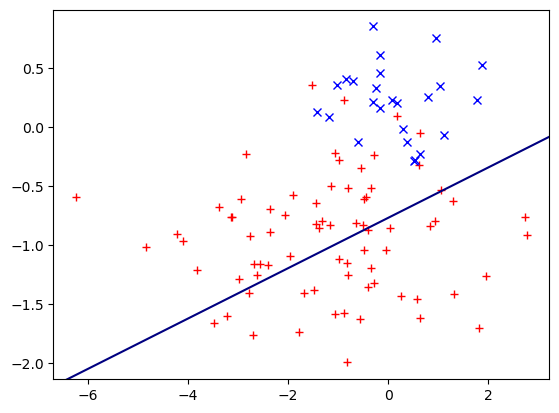

In [11]:
# number of points is obtained dynamically
N = X.shape[0]

######### initialization of the separating vector ######
w0 = initializeWeights(X,"zero")
w0[0]=1

## random ##
np.random.seed(42)
w0 = initializeWeights(X,"random")

display(X,Y, w0, 0)

In [12]:
### hyper-parameters ###
MAXITER = 20
eta = 0.001

### 2.0 Update steps, pen-and-paper

You should have done exercise "Perceptron – classics" by now, so **this should already be done**

Otherwise, **take a piece of paper and a pencil, and derive the update rule for the perceptron**, according to the method of Gradient Descent. Really do it on paper, not on the computer !! 

Note: we start with the perceptron using the *full batch* strategy. Variants include the *Online* strategy, or the *SGD* strategy.



### 2.1 Update steps, coding it 

- implement a function perceptronFullBatch(X,T,eta, w0, maxIter=20, plot=True)
- run it !
- add a print of the number of errors, so as to keep track of train and test error at all iterations of the algorithm (here for now we did not define a validation set, nor a test set)

If you have a hard time with python slices (boolean filters), you can first implement the stupid J2 Loss function (see slides), which has a simpler implementaiton code, because we update for all examples, whether they are corrrectly classified or not.

Test your code on the toy data set, and display your parameters (i.e. display the hyperplane, since we are in 2D)

In [14]:
X.shape, wparameters.shape, Y.shape

((100, 3), (3,), (100,))

In [15]:
# a bit of trial-and-error on shapes:
(((X@ wparameters))).shape

(100,)

In [28]:
(X@ wparameters) #.shape

array([ 1.26648785,  1.76638584,  1.23041738,  1.54902255,  1.46107327,
        1.1586469 ,  0.73143555,  1.11706456,  1.38714589,  0.87022865,
        1.2499236 ,  0.87625083,  1.33083295,  1.40419947,  1.20948549,
        1.85266639,  0.98555175,  0.94497235,  0.7171876 ,  1.34877651,
        1.36179515,  1.21151241,  1.07226152,  1.61553028,  0.77752414,
       -0.19605946,  0.2822997 ,  0.47626005, -0.18139054,  0.48439783,
       -0.11241297, -0.63023001,  0.68437053,  0.49032625, -0.32532716,
        0.7662462 ,  0.77160531,  0.34855635, -0.15776273, -1.00194924,
        0.16416285, -0.23957723, -0.27704839,  0.1726836 ,  0.23603851,
        0.47626405, -0.18787214, -0.74959964,  0.12645004, -0.1271913 ,
       -0.24863008, -0.41799292,  0.18879971,  0.11501262, -0.04207195,
       -0.06163236,  1.22282566,  0.13692645, -0.59503325,  0.38882297,
       -0.44887309, -0.68286965,  1.09696495, -0.31295959, -0.2597448 ,
       -0.00673178,  0.20555014,  0.74657872, -0.18669582, -0.60

In [26]:
a = np.random.random(10)-0.5
b = np.random.random(10)-0.5
a
a,b,b[a>0]

(array([ 0.13340376,  0.37146059,  0.30367208, -0.31342994,  0.392559  ,
         0.03934224,  0.30744016,  0.3960913 , -0.18199653, -0.38994808]),
 array([-0.27206484, -0.07289221,  0.31801477,  0.36073058, -0.49304787,
         0.0107473 , -0.082589  , -0.27789219, -0.38013463, -0.16238483]),
 array([-0.27206484, -0.07289221,  0.31801477, -0.49304787,  0.0107473 ,
        -0.082589  , -0.27789219]))

In [32]:
?np.einsum

In [34]:
(X@ wparameters)*Y <= 0 


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False])

In [47]:
wparameters*Y 

ValueError: operands could not be broadcast together with shapes (3,) (100,) 

In [53]:
Y[missclassfied].shape, X[missclassfied].shape

((41,), (41, 3))

In [51]:
missclassfied =((X@wparameters)*Y <= 0)
missclassfied
Y[missclassfied] @ X[missclassfied]

array([-41.        ,  43.02909482,  23.57434703])

In [73]:
def perceptronFullBatch(X,Y,eta, w0, maxIter):
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy

    ## the algo itself ##
    for iteration in range(maxIter):
        
        missclassfied =((X@wparameters)*Y <= 0)
        wparameters += eta/N*Y[missclassfied] @ X[missclassfied]
        
#         display(X,Y, wparameters, iteration)
    return wparameters




[ 0.85603415 -0.23156205  1.12465145] 0.8560341498539964 [-0.23156205  1.12465145]
projete_de_Origine_sur_droite [ 0.15034566 -0.73019939]
[ 1124.80179393 -1124.5011026 ]
[ 0.85173415 -0.22364331  1.12747344] 0.8517341498539964 [-0.22364331  1.12747344]
projete_de_Origine_sur_droite [ 0.1441741  -0.72683803]
[ 1127.61761515 -1127.32926695]
[ 0.84743415 -0.21572457  1.13029543] 0.8474341498539965 [-0.21572457  1.13029543]
projete_de_Origine_sur_droite [ 0.13806487 -0.72339509]
[ 1130.43349872 -1130.15736897]
[ 0.84323415 -0.20806753  1.13299234] 0.8432341498539965 [-0.20806753  1.13299234]
projete_de_Origine_sur_droite [ 0.13221887 -0.71997283]
[ 1133.12455765 -1132.86011991]
[ 0.83903415 -0.20041049  1.13568924] 0.8390341498539965 [-0.20041049  1.13568924]
projete_de_Origine_sur_droite [ 0.12643384 -0.71647723]
[ 1135.81567756 -1135.56280988]
[ 0.83513415 -0.1934878   1.13803217] 0.8351341498539965 [-0.1934878   1.13803217]
projete_de_Origine_sur_droite [ 0.12126201 -0.71322363]
[ 1138

/tmp/ipykernel_1341571/348601522.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


projete_de_Origine_sur_droite [ 0.05267729 -0.66172491]
[ 1168.71571343 -1168.61035884]
[ 0.77543415 -0.08817563  1.16997944] 0.7754341498539965 [-0.08817563  1.16997944]
projete_de_Origine_sur_droite [ 0.04966807 -0.65903264]
[ 1170.02911259 -1169.92977646]
[ 0.77263415 -0.08331864  1.17129585] 0.7726341498539965 [-0.08331864  1.17129585]
projete_de_Origine_sur_droite [ 0.04668645 -0.65631949]
[ 1171.34253937 -1171.24916647]
[ 0.77003415 -0.07935553  1.17241436] 0.7700341498539964 [-0.07935553  1.17241436]
projete_de_Origine_sur_droite [ 0.0442527  -0.65379824]
[ 1172.45861647 -1172.37011106]
[ 0.76743415 -0.07539242  1.17353287] 0.7674341498539964 [-0.07539242  1.17353287]
projete_de_Origine_sur_droite [ 0.04183979 -0.65126403]
[ 1173.5747144  -1173.49103482]
[ 0.76483415 -0.07142931  1.17465139] 0.7648341498539963 [-0.07142931  1.17465139]
projete_de_Origine_sur_droite [ 0.0394478  -0.64871708]
[ 1174.69083326 -1174.61193766]
[ 0.76233415 -0.0678877   1.17567913] 0.7623341498539964 

projete_de_Origine_sur_droite [-0.00924354 -0.55926575]
[ 1202.9079207  -1202.92640778]
[0.67153415 0.02067161 1.2032212 ] 0.6715341498539974 [0.02067161 1.2032212 ]
projete_de_Origine_sur_droite [-0.00958569 -0.55794894]
[ 1203.21161883 -1203.23079021]
[0.67013415 0.02146142 1.20352524] 0.6701341498539974 [0.02146142 1.20352524]
projete_de_Origine_sur_droite [-0.00992594 -0.55663238]
[ 1203.51531885 -1203.53517074]
[0.66873415 0.02225123 1.20382929] 0.6687341498539975 [0.02225123 1.20382929]
projete_de_Origine_sur_droite [-0.0102643  -0.55531608]
[ 1203.81902076 -1203.83954937]
[0.66733415 0.02304104 1.20413333] 0.6673341498539975 [0.02304104 1.20413333]
projete_de_Origine_sur_droite [-0.01060077 -0.55400003]
[ 1204.12272457 -1204.14392611]
[0.66593415 0.02383085 1.20443737] 0.6659341498539976 [0.02383085 1.20443737]
projete_de_Origine_sur_droite [-0.01093534 -0.55268424]
[ 1204.42643027 -1204.44830096]
[0.66453415 0.02462066 1.20474141] 0.6645341498539976 [0.02462066 1.20474141]
proj

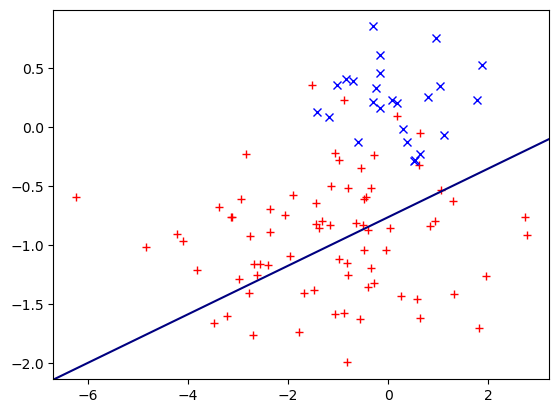

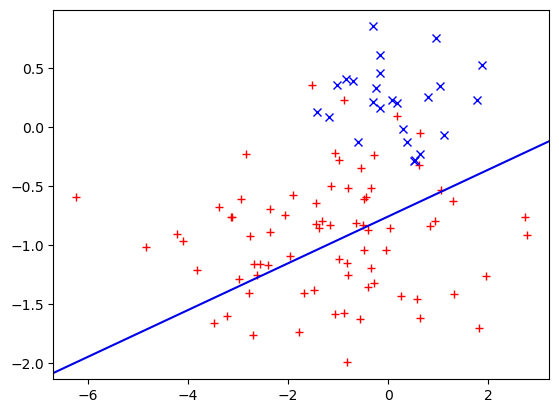

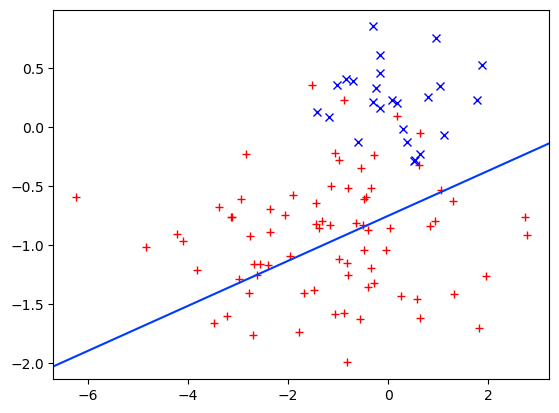

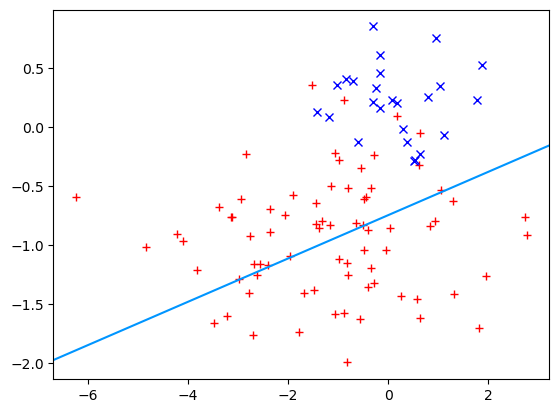

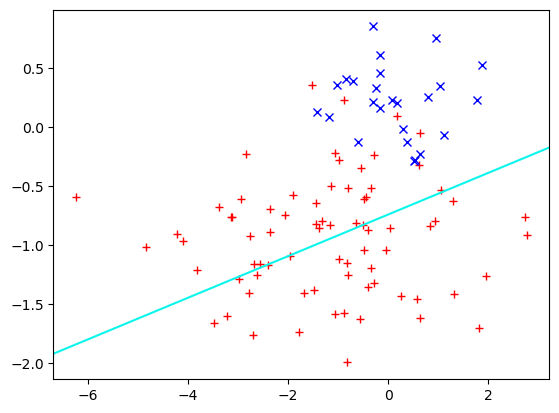

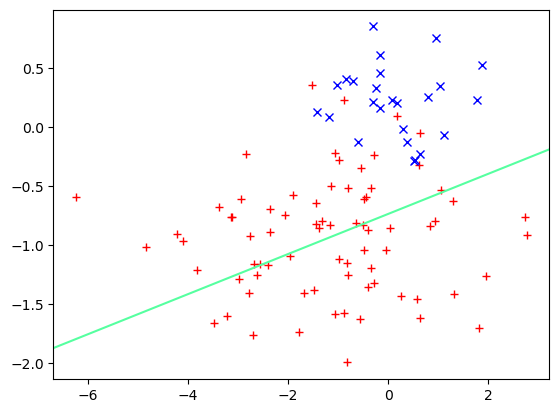

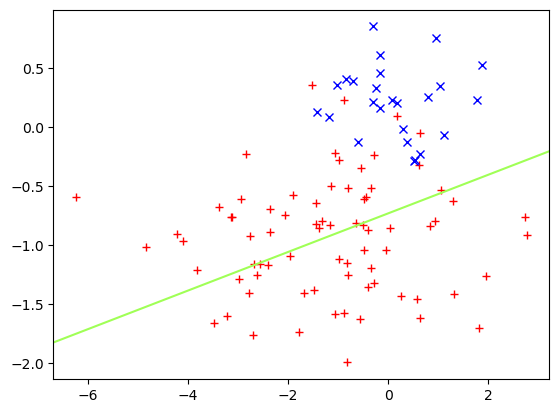

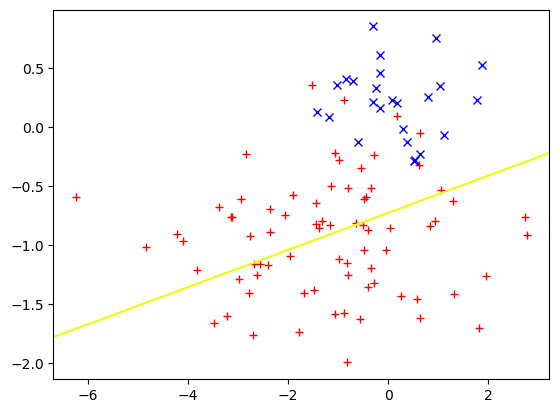

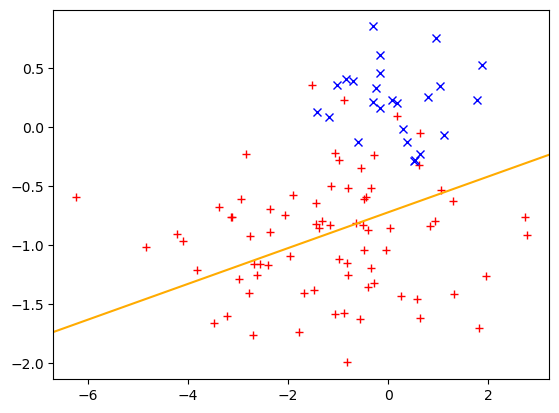

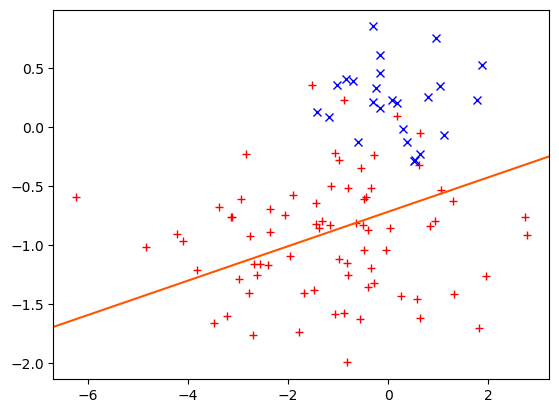

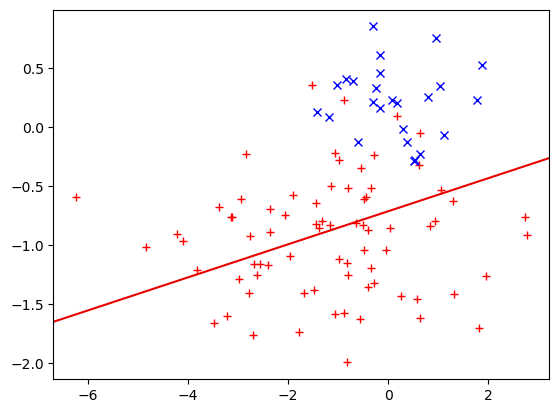

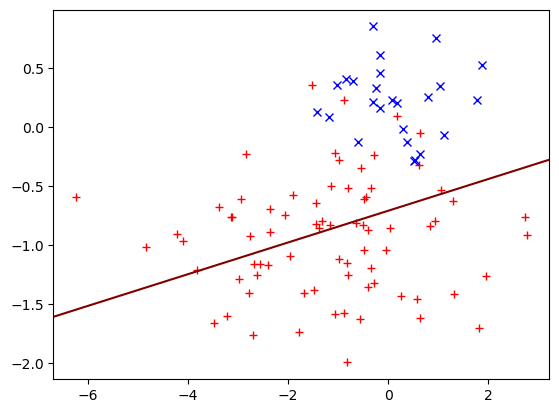

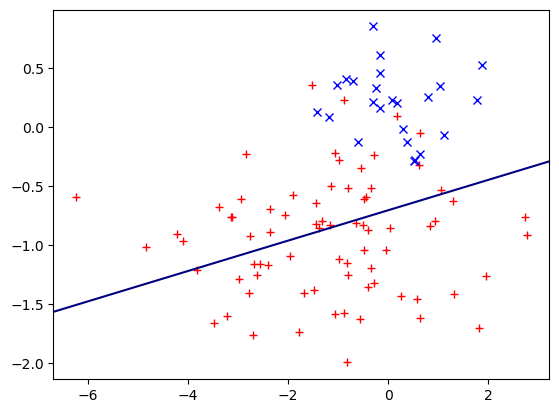

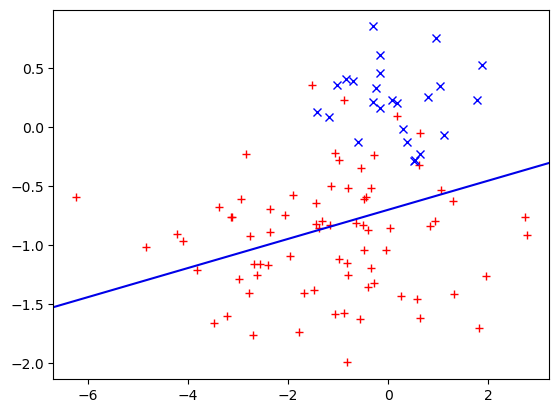

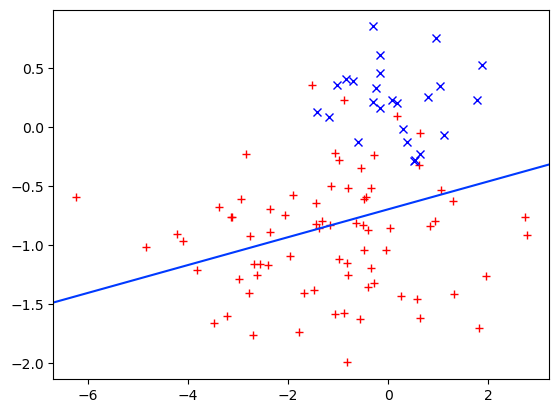

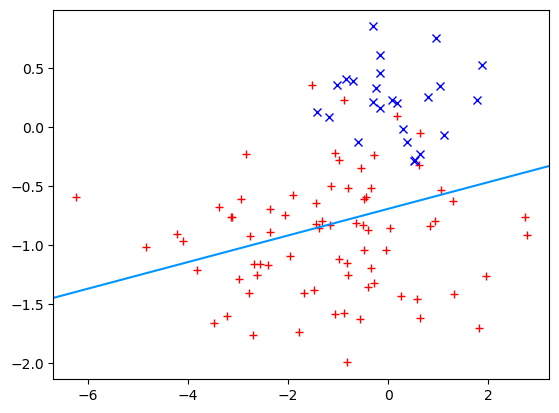

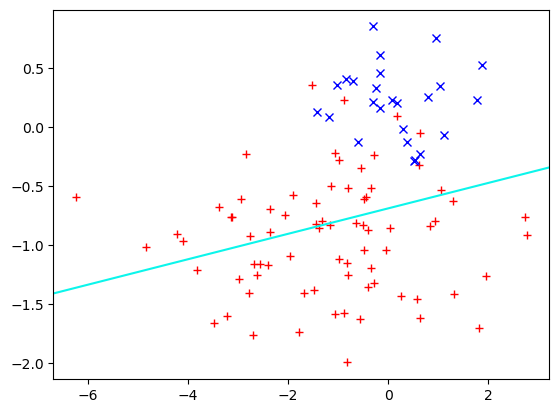

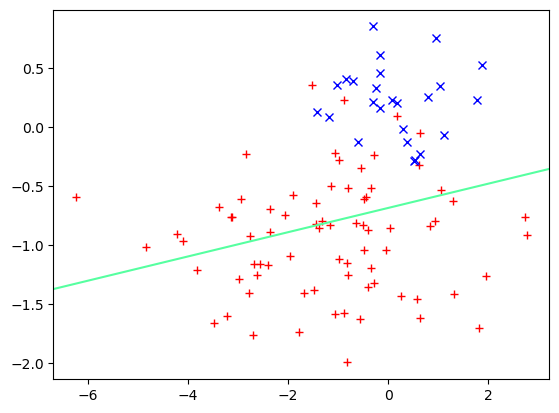

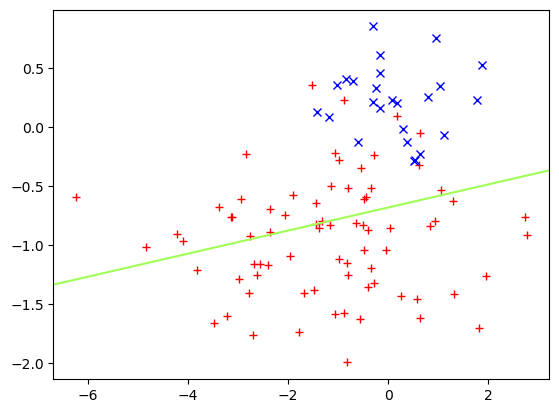

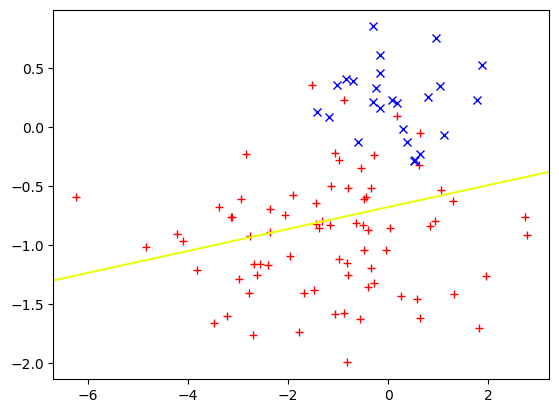

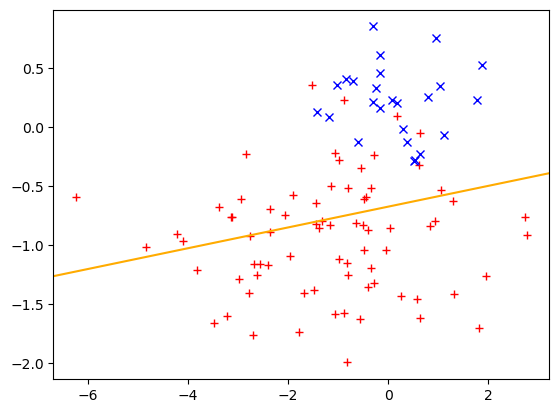

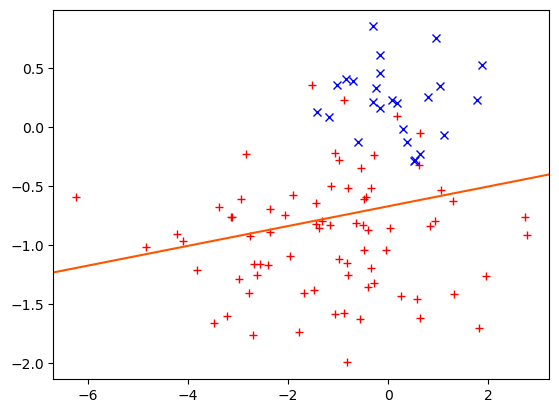

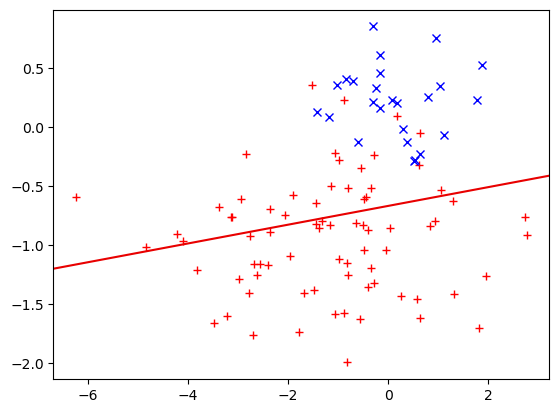

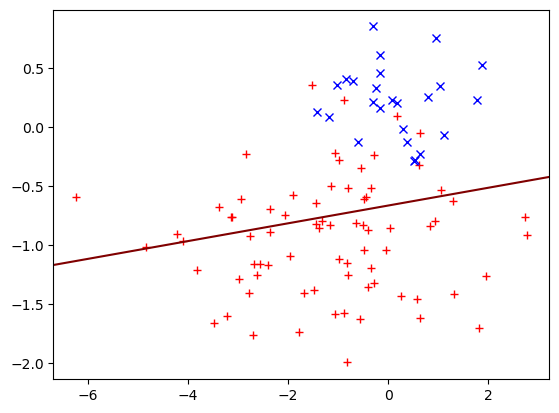

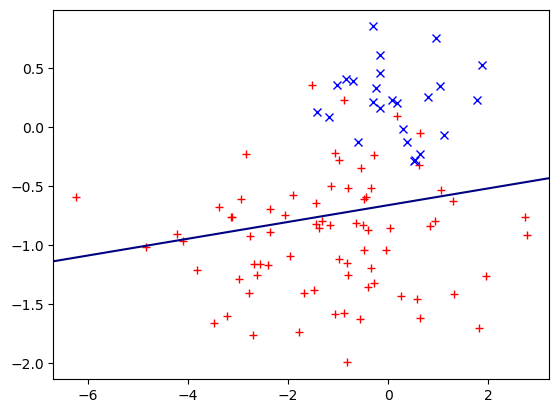

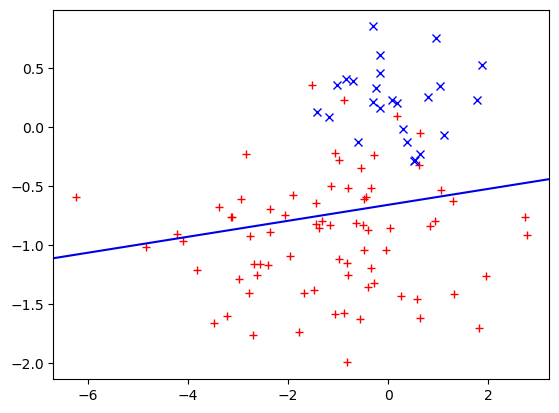

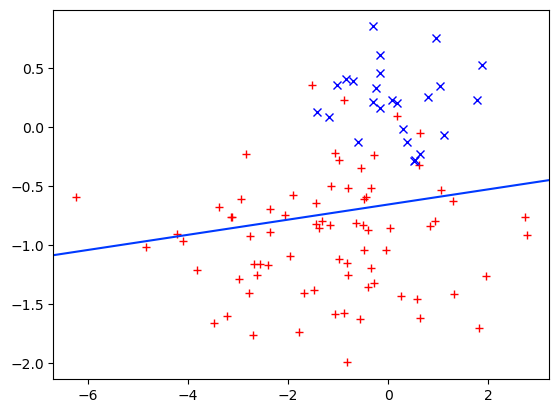

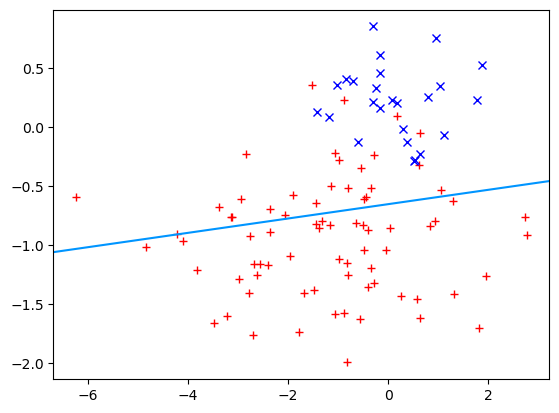

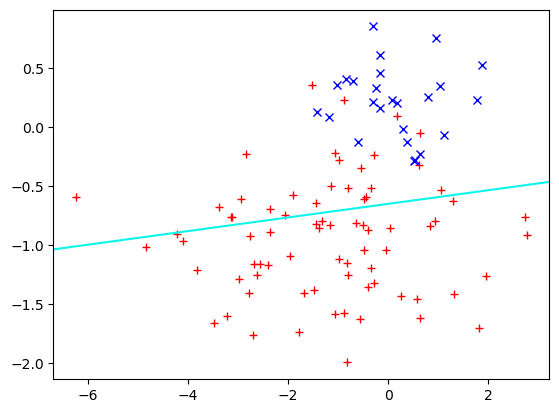

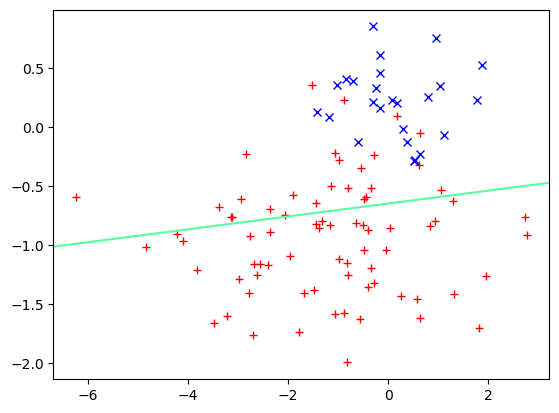

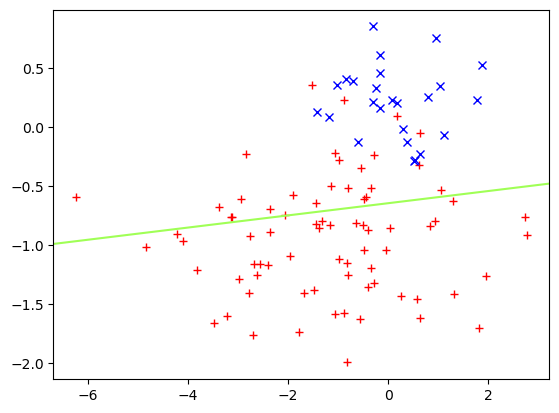

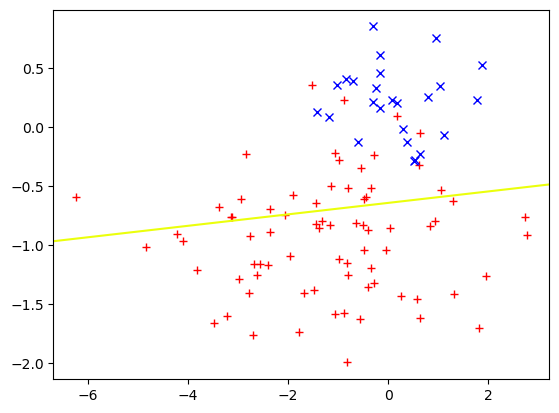

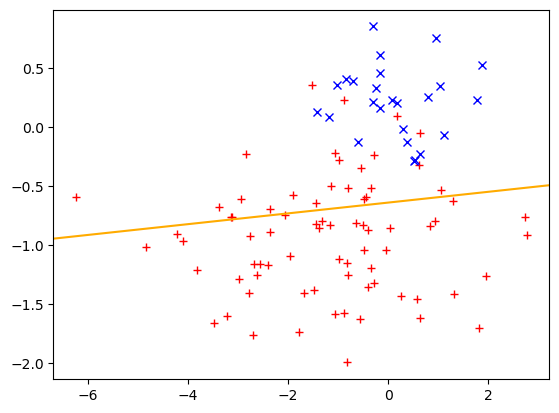

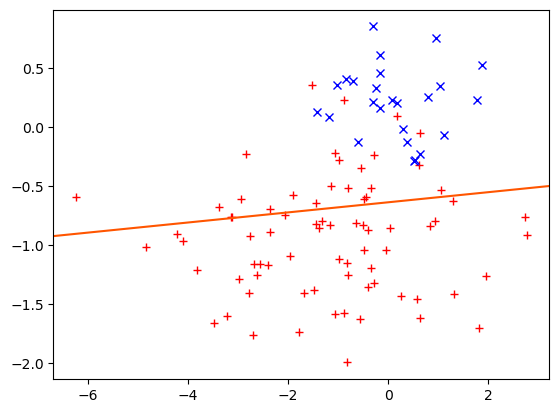

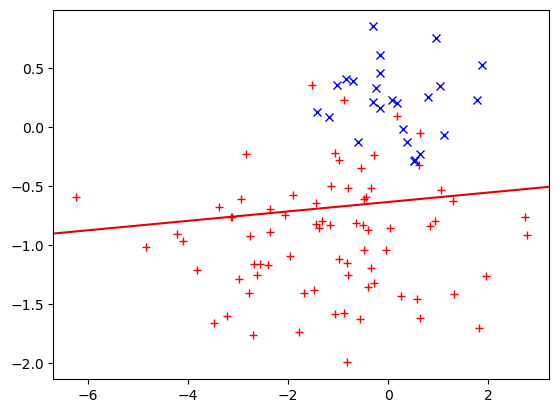

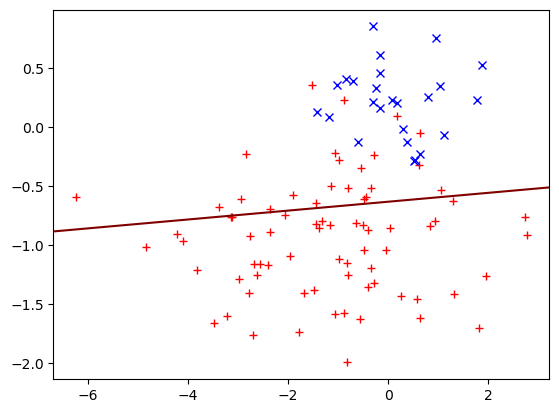

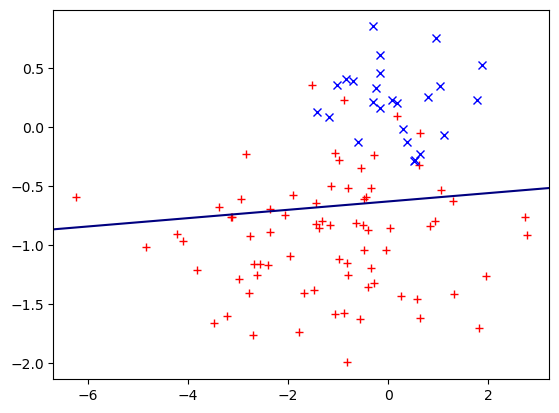

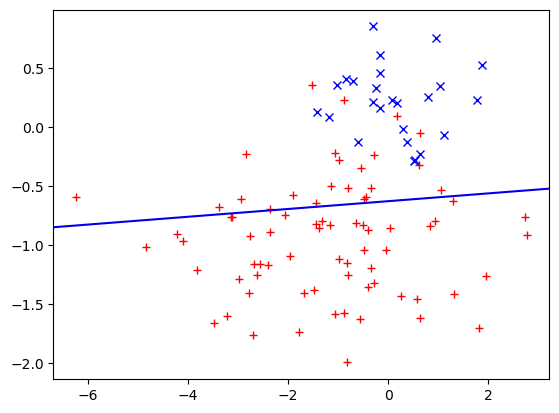

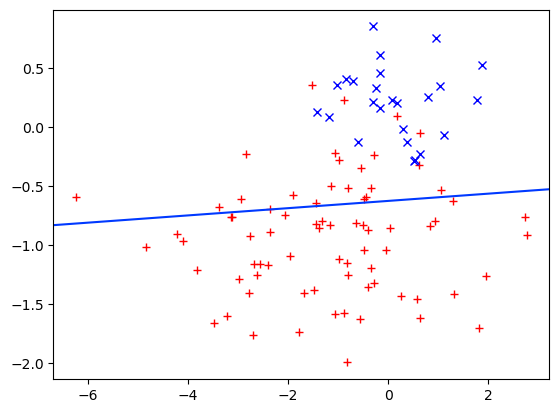

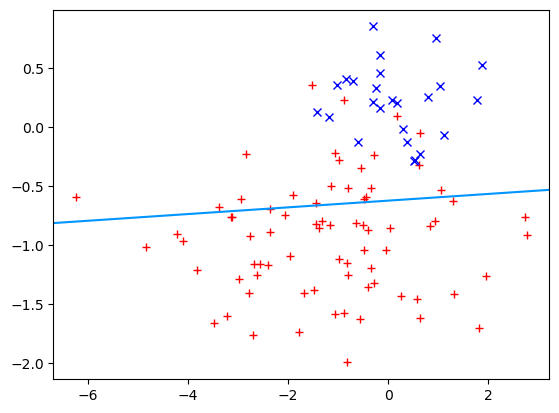

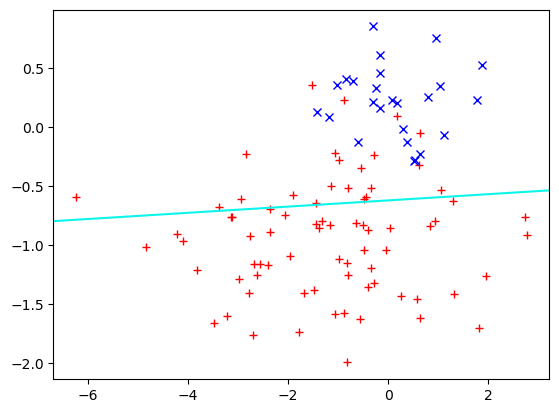

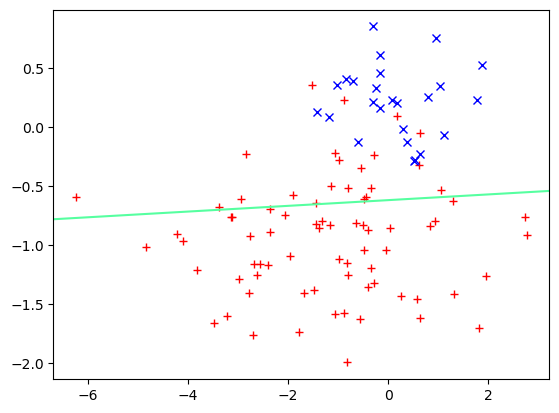

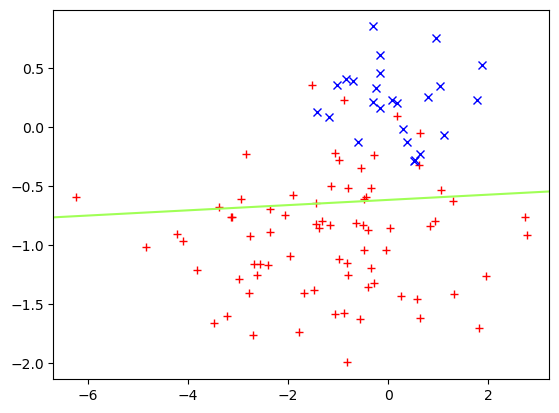

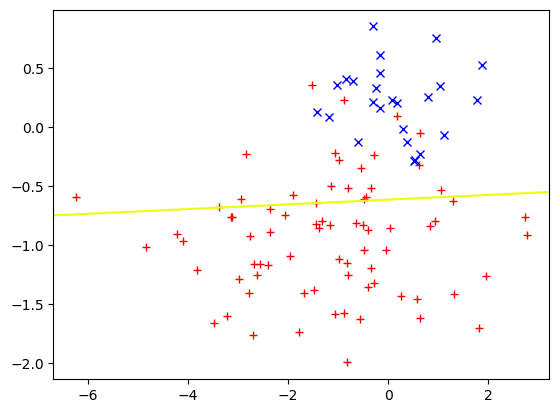

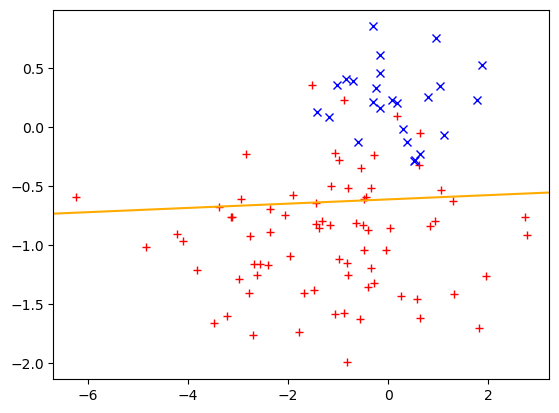

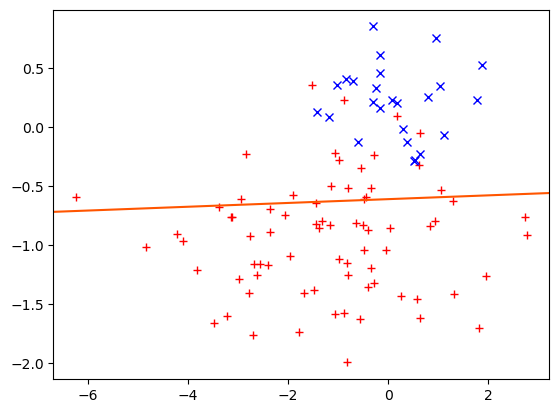

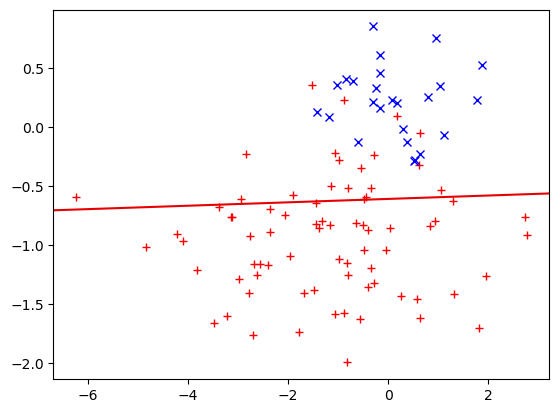

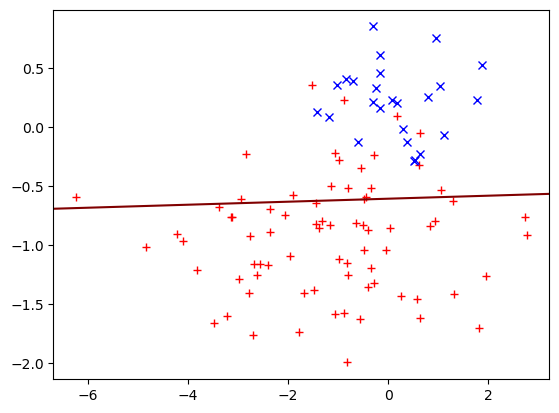

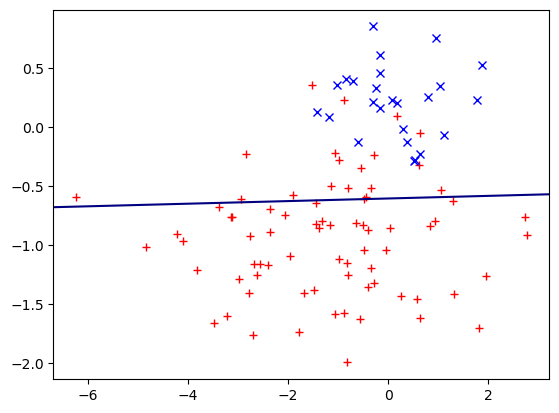

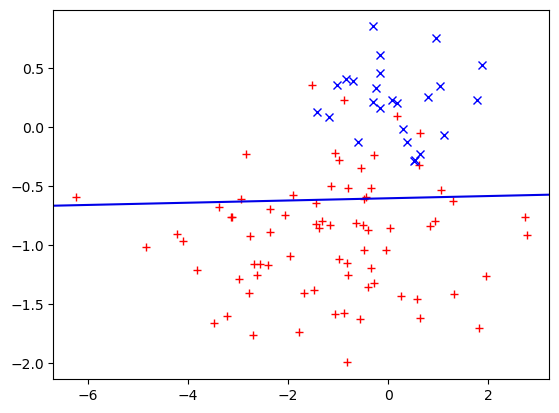

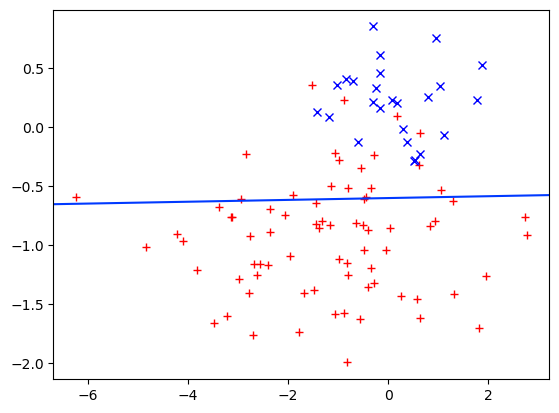

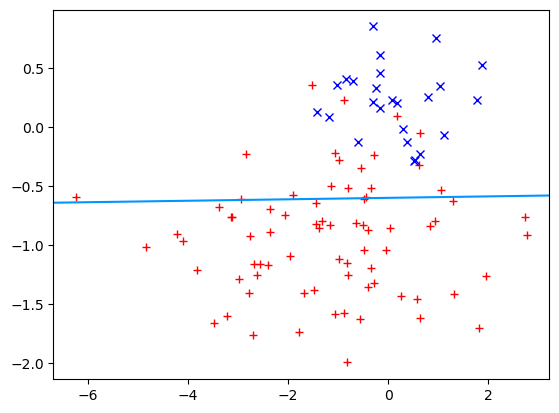

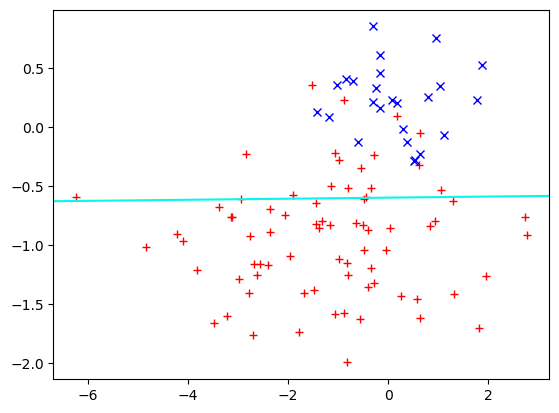

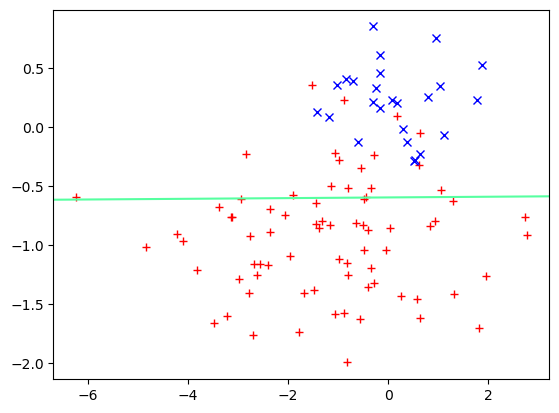

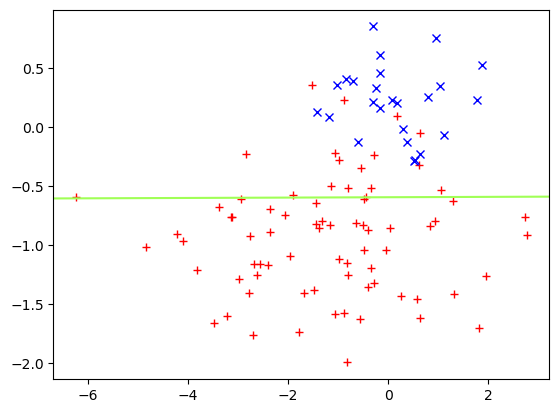

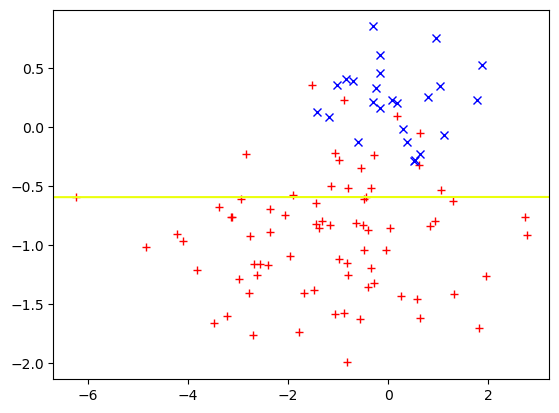

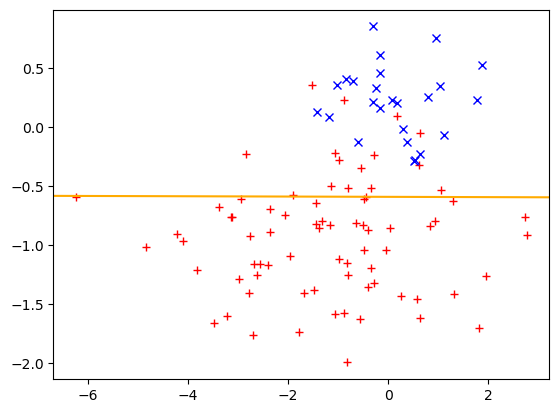

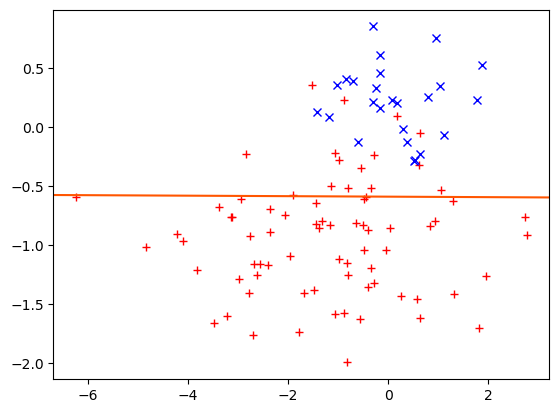

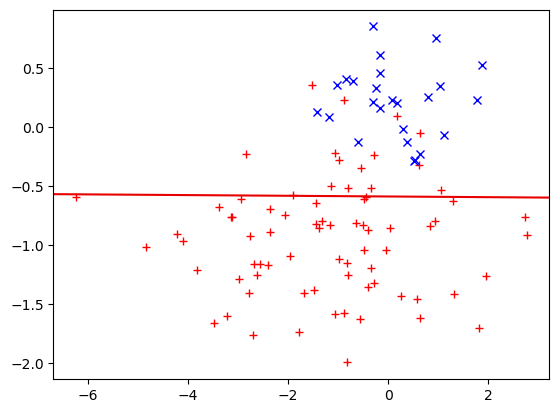

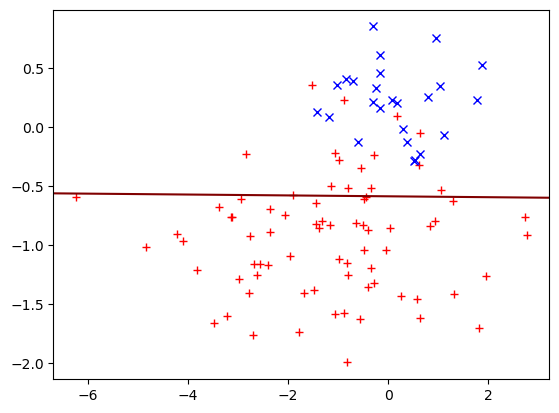

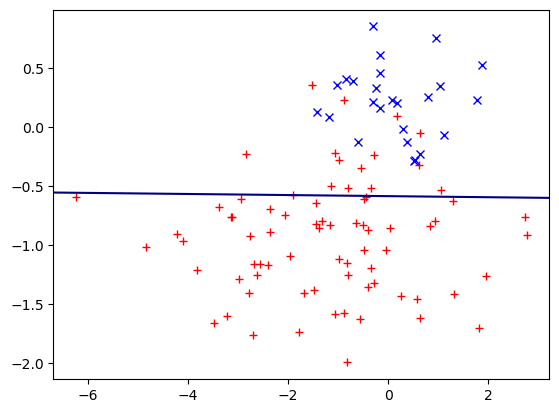

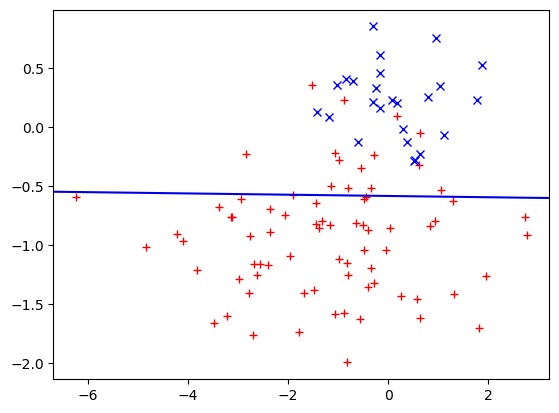

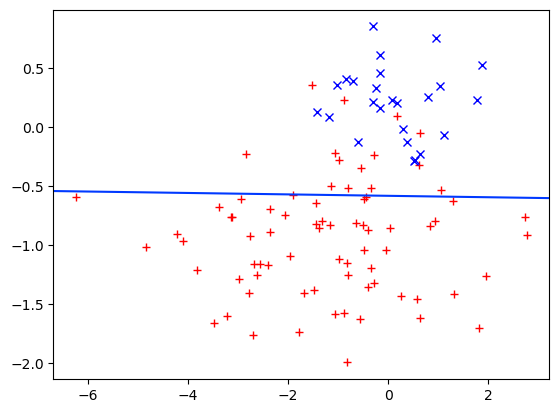

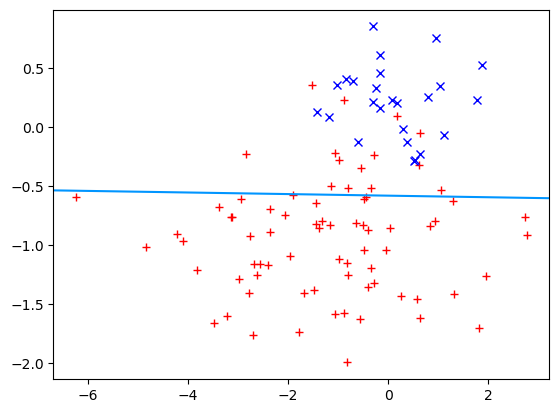

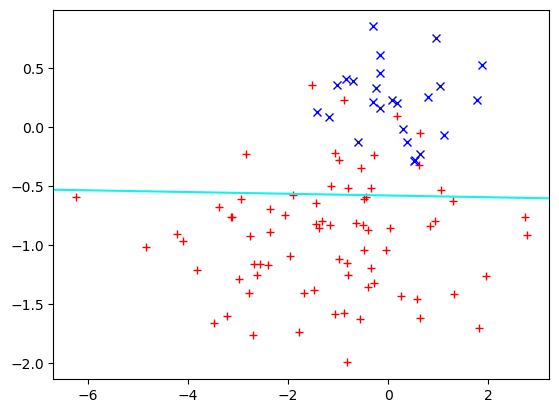

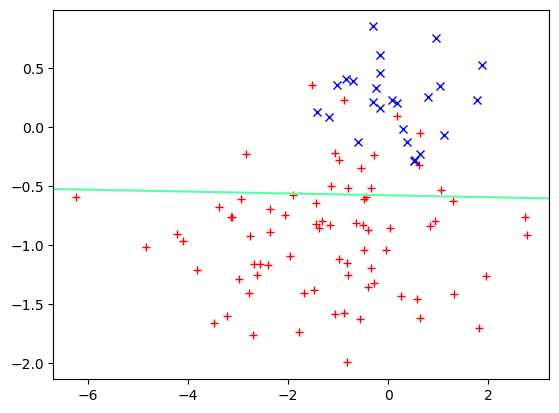

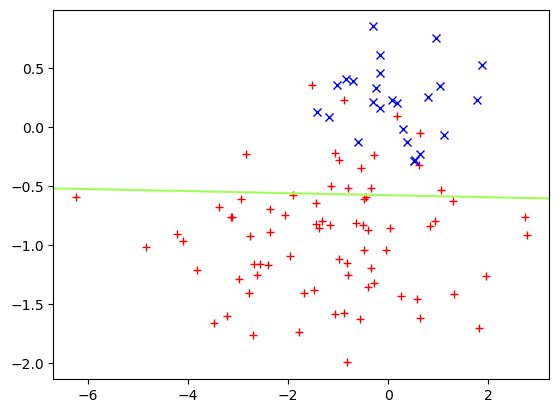

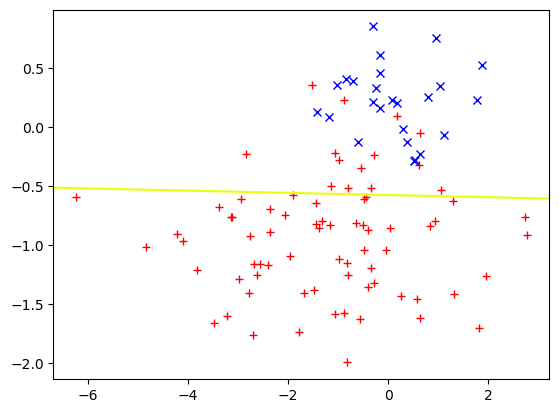

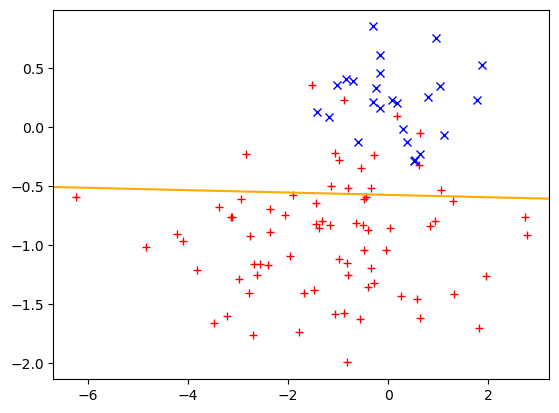

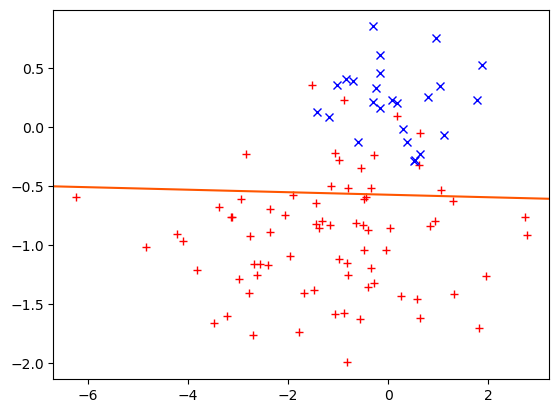

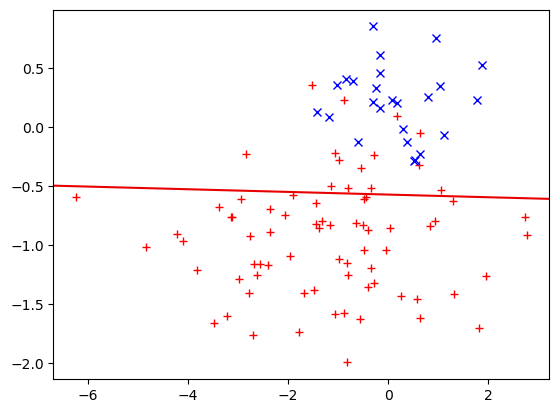

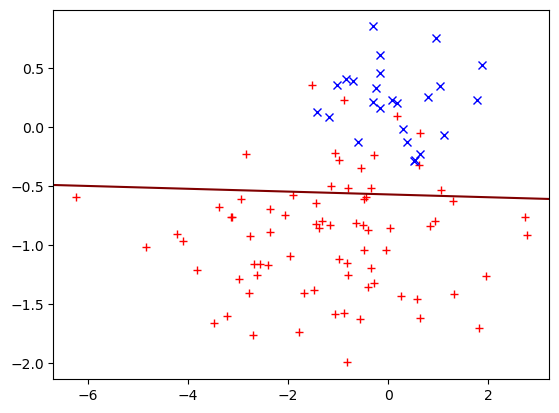

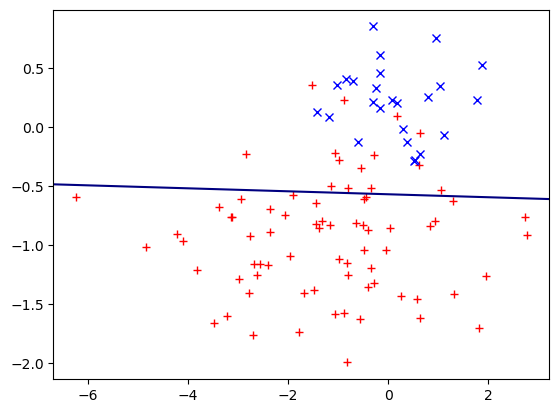

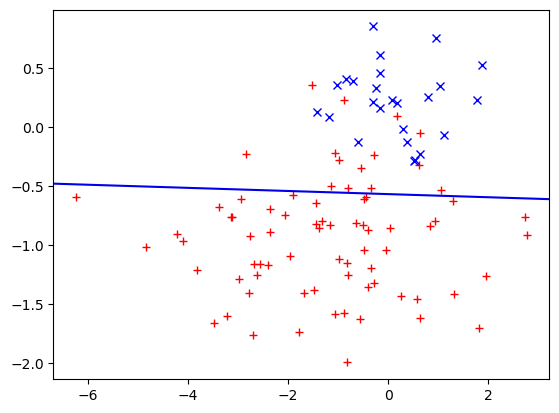

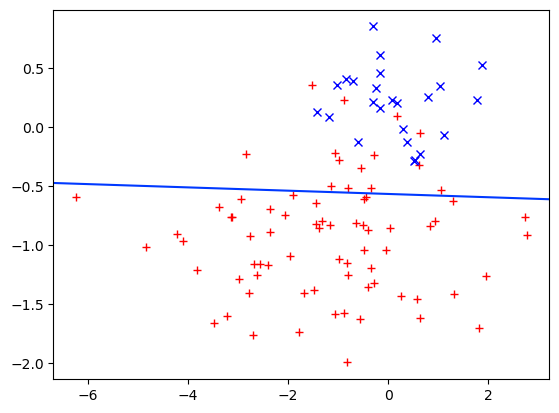

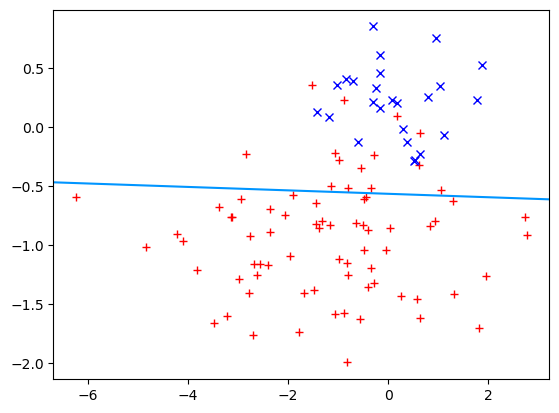

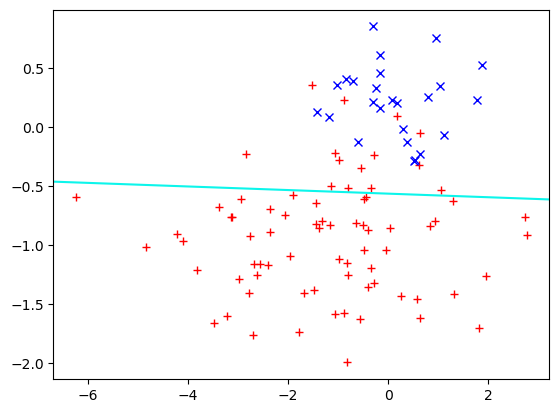

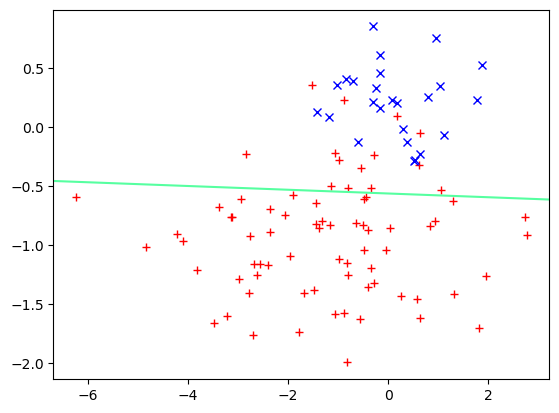

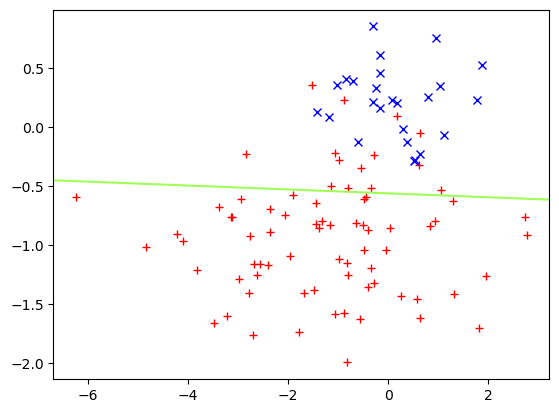

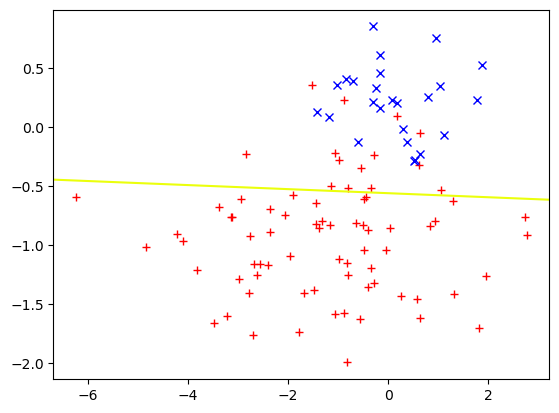

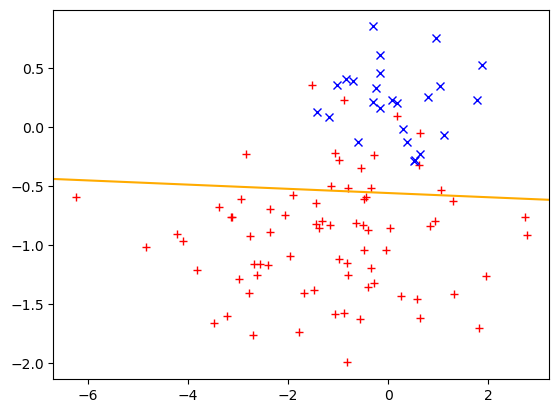

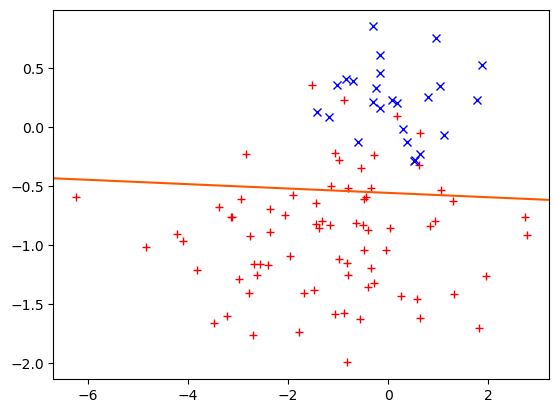

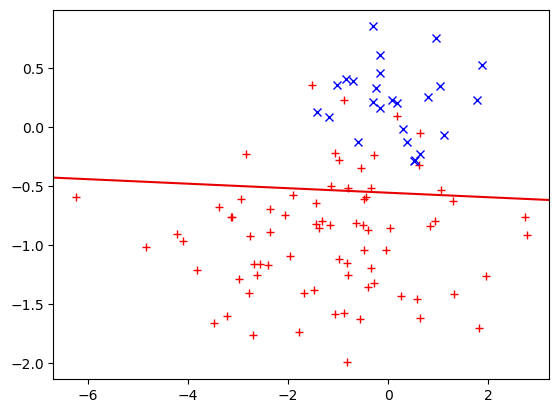

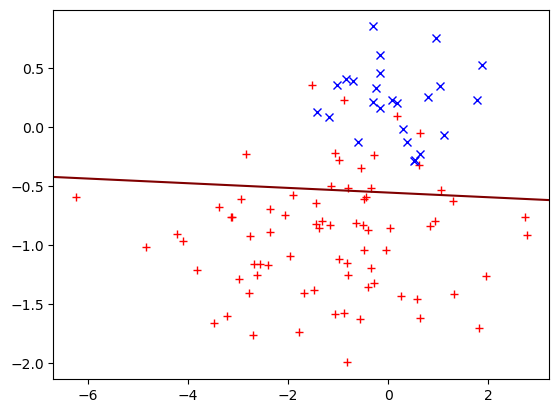

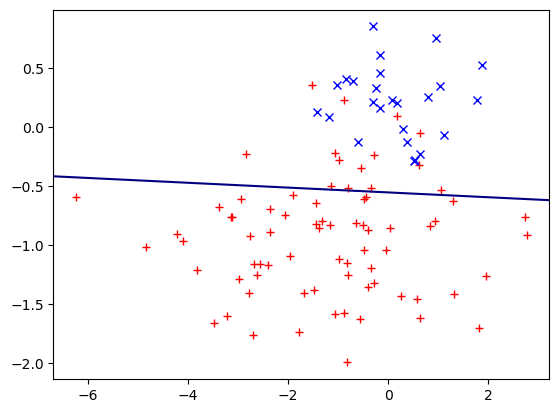

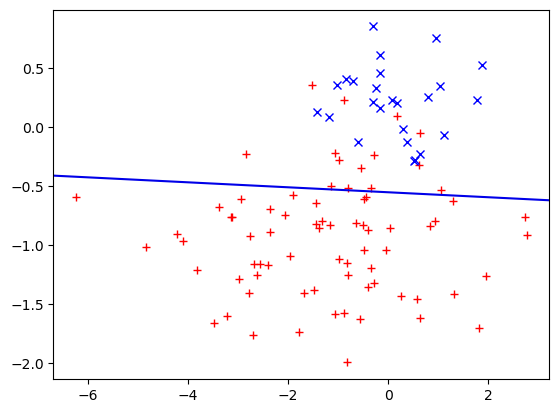

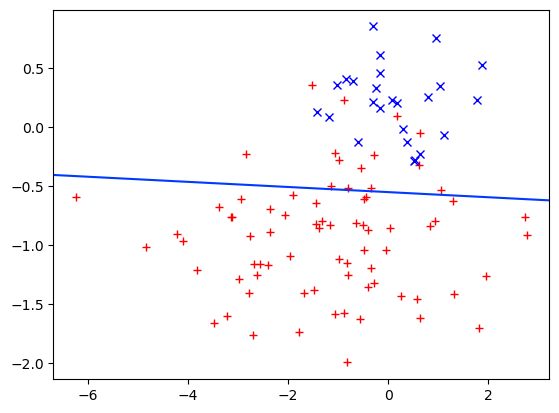

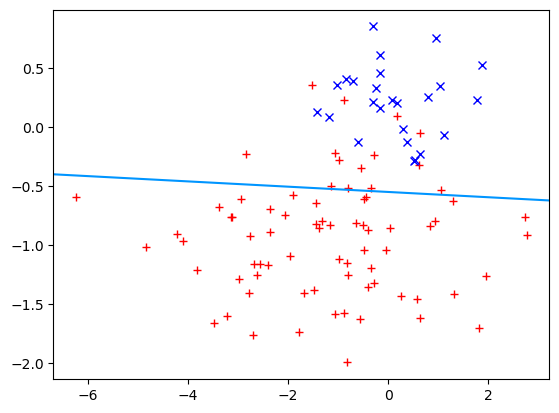

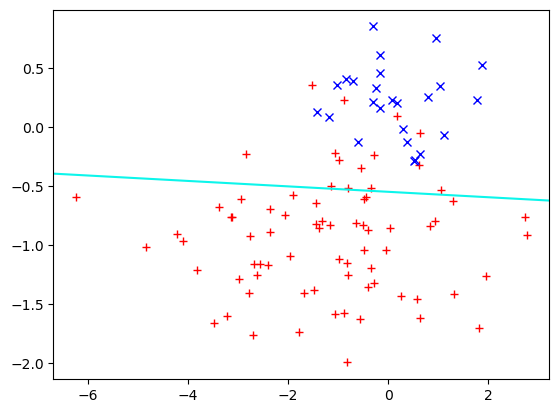

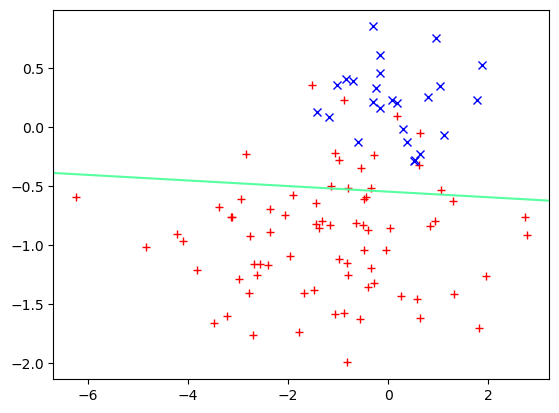

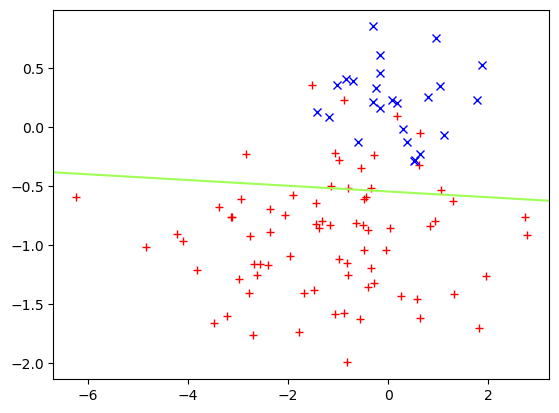

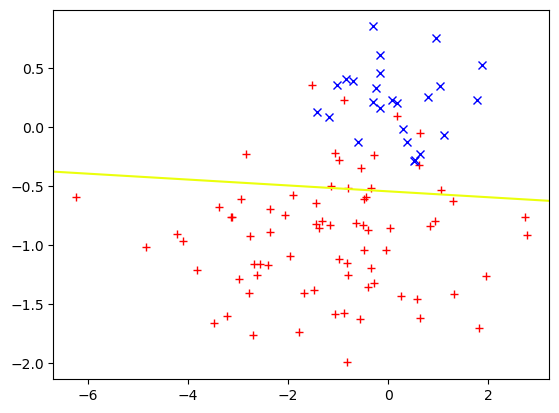

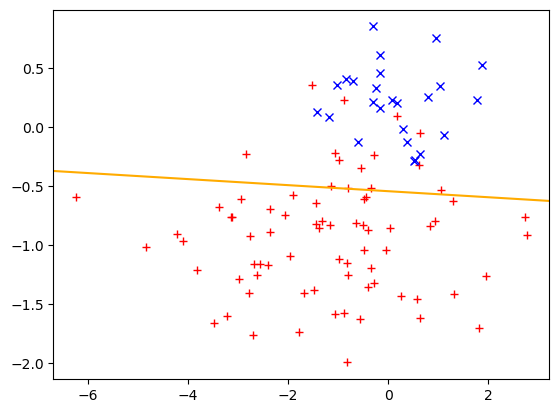

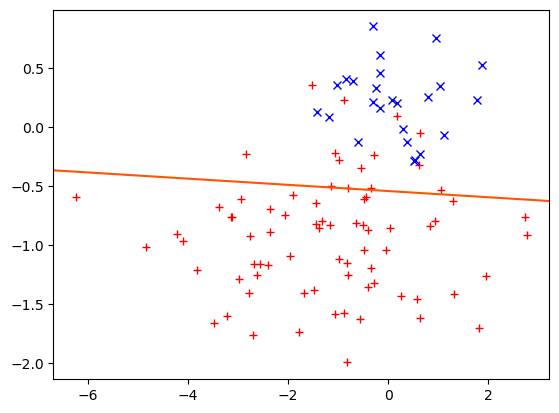

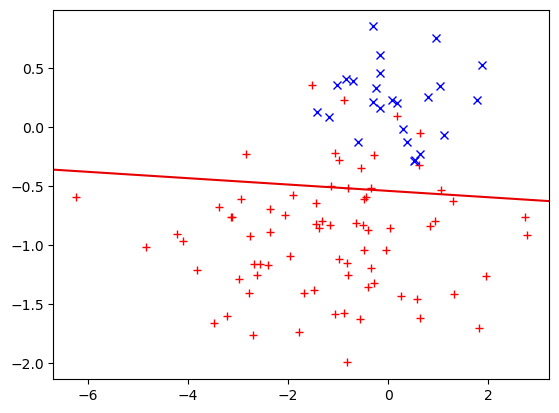

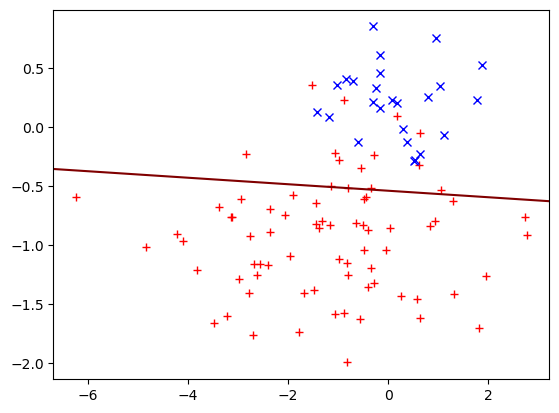

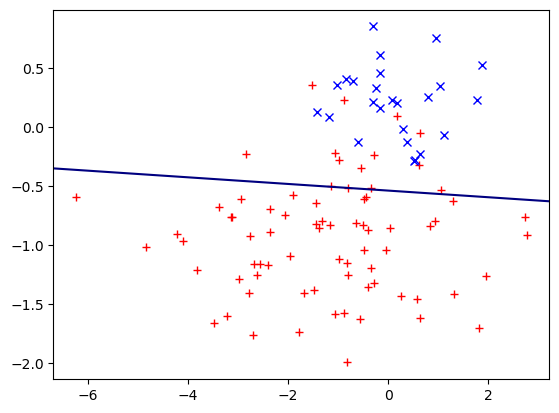

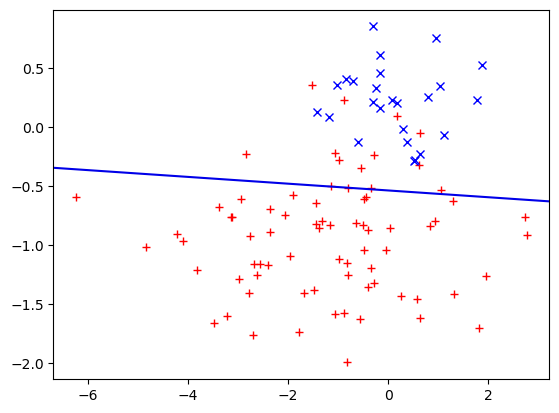

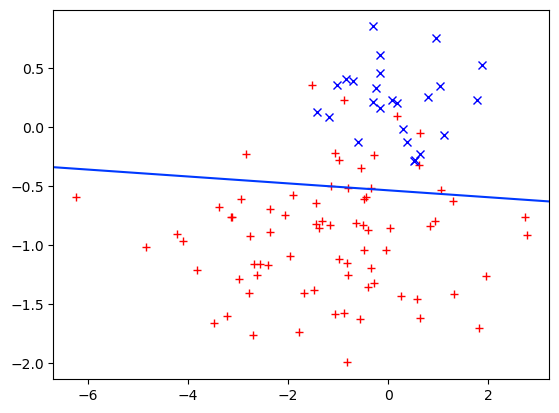

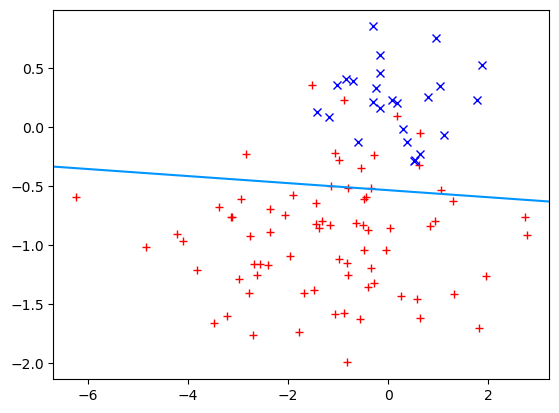

In [62]:
wparameters =  perceptronFullBatch(X,Y,0.01, w0, 100)

[0.19655415 0.23479473 1.18184568] 0.1965541498539435 [0.23479473 1.18184568]
projete_de_Origine_sur_droite [-0.03178612 -0.1599963 ]
[ 1181.81389696 -1181.8774692 ]


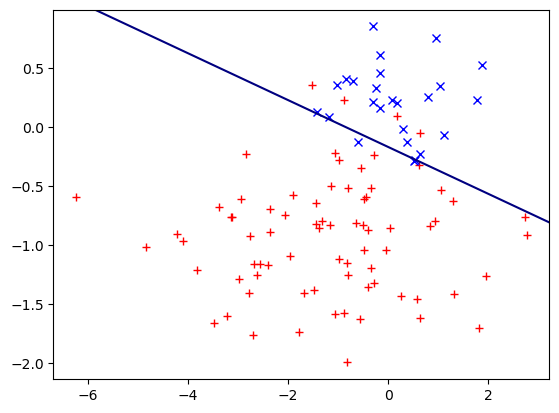

In [58]:
display(X,Y, wparameters, 0)

### 2.2 Testing on more realistic data: MNIST (restricted to 2 classes)

Test your code on the following data set. You should be able to fully fit the train set.

Question: can you still picture the hyperplane ? Remember that we have many dimensions, but that the data consists in images.

In [63]:
## MNIST, reduced in quality (8x8 pixels pictures) ##
K=2
import sklearn.datasets
Xmnist,Tmnist = sklearn.datasets.load_digits(n_class=K, return_X_y=True)

In [64]:
Xmnist.shape, Tmnist.shape

((360, 64), (360,))

#### We show a couple of pictures and their labels

0
1
0
1
0
1
0
0
1
1


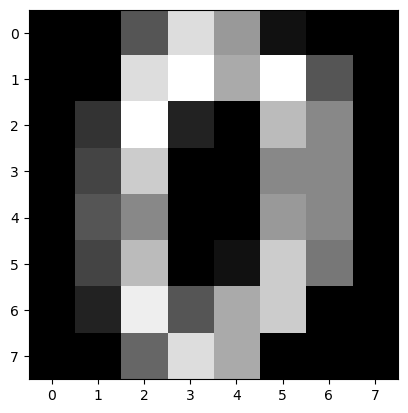

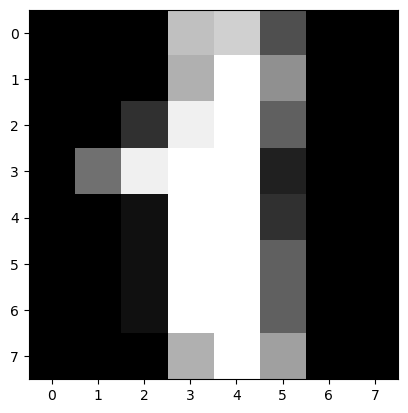

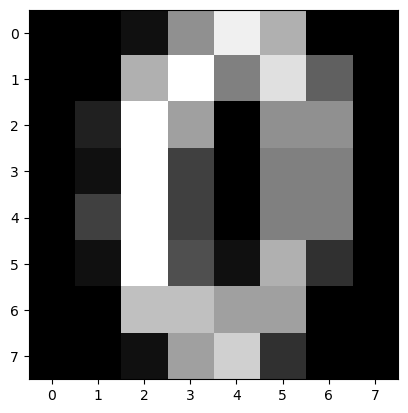

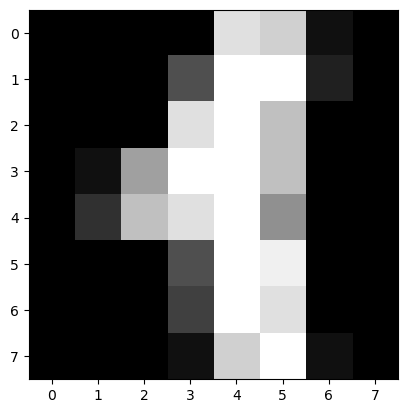

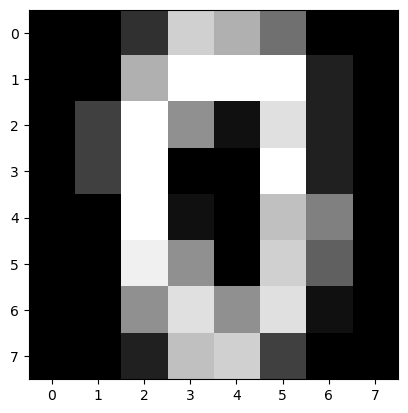

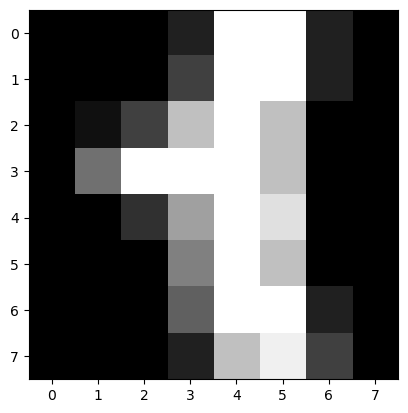

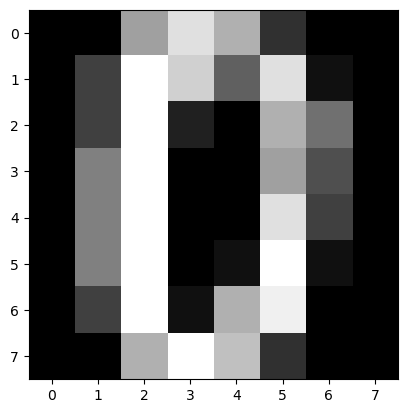

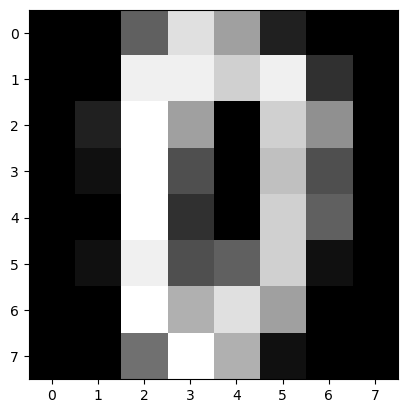

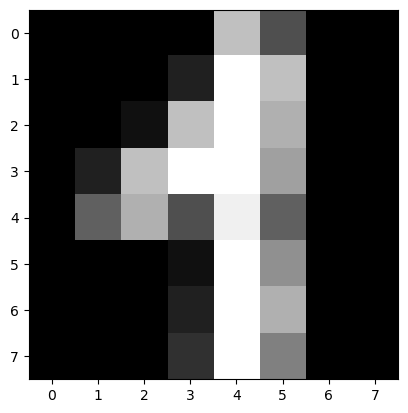

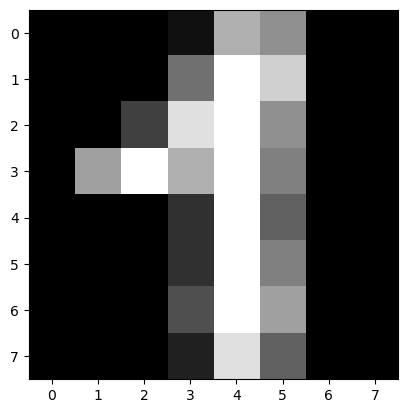

In [65]:
for n in range(10):
    plt.figure()
    plt.imshow(Xmnist[n].reshape(8, 8) , cm.gray)
    print(Tmnist[n])

#### Note that the labels are encoded as 0, 1 and not -1, 1. Is that a problem ?

In [66]:
Tmnist[:5]

array([0, 1, 0, 1, 0])

In [67]:
## TODO : do something about it !?

In [69]:
Tmnist*=2
Tmnist -=1

In [70]:
Tmnist[:5]

array([-1,  1, -1,  1, -1])

In [71]:
np.random.seed(42)
w0mnist = initializeWeights(Xmnist,"random")

In [74]:
eta=0.01
MAXITER=100
wparameters =  perceptronFullBatch(Xmnist,Tmnist,eta, w0mnist, MAXITER)

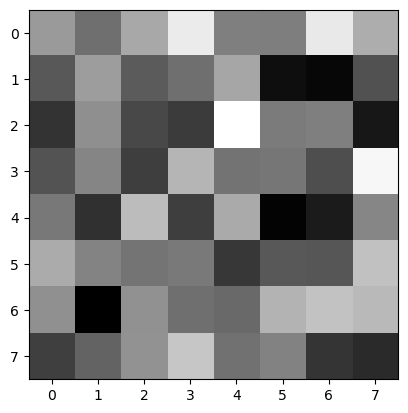

In [75]:
plt.imshow(wparameters.reshape(8, 8) , cm.gray)

### 3.1 Bonus / Homework: Re-code your algo, putting it inside a class

The class should contain an `__init__` method, a `fit` method and a `predict` method, at least. It may also include a `score` method 

### 3.2 Bonus / Homework: Compare the evolution of the hyperplane in the Online and Full-Batch strategies, on the following data set: 
- for this data set (and maybe also the one at the beggining of the TP), get an intuitive feeling of how the plane evolves over iterations, for the online perceptron and for the full batch perceptron
- which algo seems the most efficient ? (Try several initializations of $\vec w_0$).

#### Note: 
this is the data set used in exercise "2.1.2 Roseblatt’s online Perceptron"

[1. 0. 1.] 1.0 [0. 1.]
projete_de_Origine_sur_droite [-0. -1.]
[ 1000. -1000.]


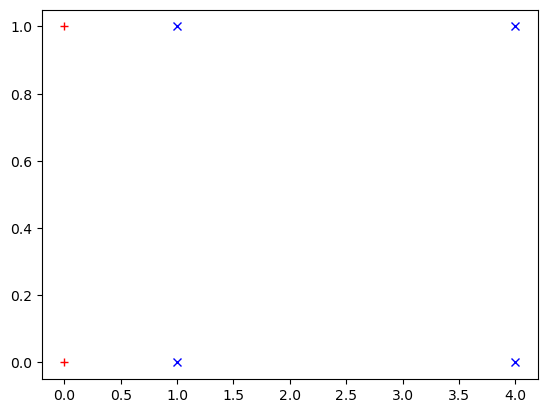

In [76]:
## data set 1
Xtoy = np.array([ [0, 0], [0, 1], [1, 0], [1, 1], [4, 0], [4, 1] ])
Ttoy = np.array([ -1 , -1 , 1 , 1 , 1 ,1])
N = Xtoy.shape[0]
Xtoy =  np.hstack((np.ones((N,1)), Xtoy))  # extended vector
wparameters_toy = np.array([1, 0.00, 1])
display(Xtoy,Ttoy, wparameters_toy, 1)

In [ ]:
plotting = True
eta=0.2
MAXITER=30
wparameters =  perceptronFullBatch(Xtoy,Ttoy,eta, wparameters_toy, MAXITER)

In [ ]:
def perceptronOnline(X,y,eta, w0, maxIter=20, plot=True):
    # sets the number of points
    N = X.shape[0]

    wparameters=w0.copy()   # deep copy
    ## the algo itself
    for iteration in range(maxIter):
    
        ## TODO
        ??
        
    return wparameters

In [ ]:
plotting = True
eta=0.2
MAXITER=30
wparameters =  perceptronOnline(Xtoy,Ttoy,eta, wparameters_toy, MAXITER)

### 3.3 Bonus / Homework: use sklearn to check your codes

In [ ]:
import sklearn ## this line should run, at home (check it)